In [1]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import itertools
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel('Downloads/store.xls')

In [3]:
#Taking a new dataframe with only Order Date and Sales columns.
df1 = df[['Order Date', 'price']]
#Sorting the dataframe by order date
df = df.sort_values('Order Date')
#Inspecting for missing values

In [4]:
df2 = df1.groupby('Order Date')['price'].sum().reset_index()

In [5]:
df2 = df2.set_index('Order Date')

In [6]:
y = df2['price'].resample('MS').mean()

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

In [8]:
#Setting seasonality, trend and noise parameters 
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)for x in list(itertools.product(p, d, q))]

In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
        except:
            continue

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimiz

In [10]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=1, figsize=(18, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


NameError: name 'ax' is not defined

In [12]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print("MSE = ",mse)
rmse = format(round(np.sqrt(mse), 2))
print("RMSE = ",rmse)

MSE =  2185108.8219147
RMSE =  1478.21


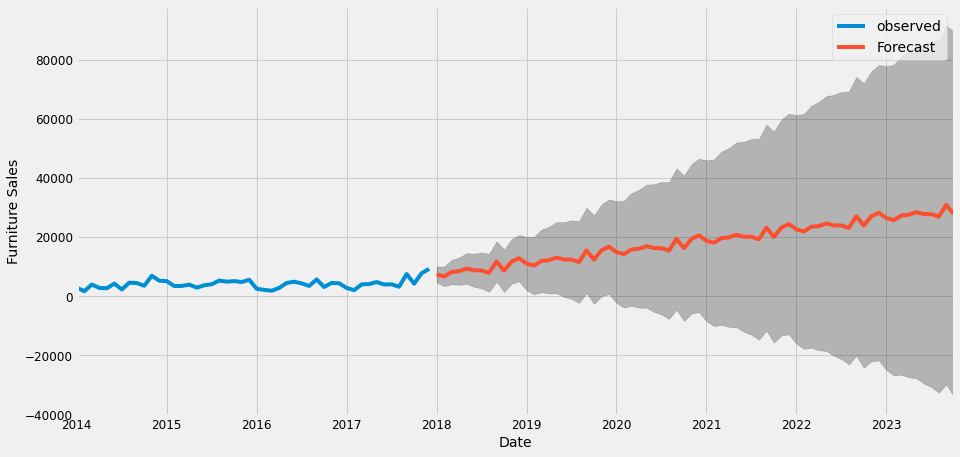

In [13]:
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
date=input("Enter date in format yyyy-mm-01")
x=pred_ci.loc[date,'lower price']
x

In [16]:
y=pred_ci.loc[date,'upper price']
y

19302.9207849406